# ****Range of incubation periods for the disease(Covid-19) in humans****

In [1]:
import numpy as np
import pandas as pd
import json
import re
import os
from matplotlib import style
from tqdm import tqdm
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,8),'figure.dpi':(70)})
plt.style.use(['fivethirtyeight'])

# ****These are the directories where the articles are saved.****

In [2]:
root_dirs = ['/kaggle/input/CORD-19-research-challenge']
dirs = ['biorxiv_medrxiv', 'comm_use_subset', 'noncomm_use_subset', 'custom_license']
docs = list()

The below snippet parses the JSON files using the key and values parsion and then saving the Title, Abstract and the Text of the Scholarly Article

In [3]:
for rd in root_dirs:
    for d in dirs:
        for file in (os.listdir(f"{rd}/{d}/{d}")):
            file_path = f"{rd}/{d}/{d}/{file}"
            j = json.load(open(file_path,'rb'))
            title = j['metadata']['title']
            
            try:
                abstract = j['abstract'][0]['text']
            except:
                abstract = ''
                
            full_text = ''
            for text in j['body_text']:
                full_text = full_text + text['text'] + '\n\n'
            docs.append([title, abstract, full_text])
df = pd.DataFrame(docs, columns = ['Title', 'Abstract', 'full_text'])
keyword = "incubation"
incubation = df[df['full_text'].str.contains(keyword)]

In [4]:
incubation.head()

,Title,Abstract,full_text
0,SPINT2 inhibits proteases involved in activati...,Viruses possessing class I fusion proteins req...,Influenza-like illnesses (ILIs) represent a si...
3,Ruler elements in chromatin remodelers set nuc...,Arrays of regularly spaced nucleosomes dominat...,Arrays of regularly spaced nucleosomes dominat...
5,Transmission of corona virus disease 2019 duri...,The ongoing outbreak of novel corona virus dis...,The corona virus disease has spread rapidly th...
7,Clinical outcomes of 402 patients with COVID-2...,The SARS-CoV-2 outbreak is causing widespread ...,"In December 2019, a cluster of ""atypical"" pneu..."
9,Rapid Detection of Novel Coronavirus (COVID-19...,Novel Corona virus (COVID-19 or 2019-nCoV) is ...,The recent outbreak of Novel Coronavirus (COVI...


In [5]:
text = incubation['full_text'].values

Utilizing the Regular Expression rather a naive method to get the days in the numeric form and append the incubation days in the list

In [6]:
keyword_time = list()
for t in text:
    for sentences in t.split(". "):
        if keyword in sentences:
            single_day = re.findall(r" \d{1,2} day", sentences)
            
            if len(single_day) == 1:
                num = single_day[0].split(" ")
                keyword_time.append(float(num[1]))
print(keyword_time)

[10.0, 5.0, 24.0, 7.0, 5.0, 20.0, 20.0, 5.0, 7.0, 14.0, 14.0, 3.0, 14.0, 11.0, 6.0, 11.0, 14.0, 5.0, 2.0, 14.0, 24.0, 18.0, 2.0, 5.0, 5.0, 5.0, 2.0, 10.0, 7.0, 3.0, 15.0, 14.0, 14.0, 3.0, 5.0, 5.0, 24.0, 5.0, 1.0, 4.0, 5.0, 5.0, 42.0, 7.0, 7.0, 6.0, 14.0, 17.0, 24.0, 14.0, 8.0, 8.0, 28.0, 14.0, 4.0, 14.0, 21.0, 7.0, 3.0, 5.0, 3.0, 3.0, 7.0, 6.0, 4.0, 5.0, 14.0, 9.0, 22.0, 22.0, 22.0, 3.0, 3.0, 14.0, 14.0, 7.0, 14.0, 10.0, 18.0, 10.0, 7.0, 10.0, 13.0, 1.0, 8.0, 14.0, 3.0, 3.0, 3.0, 5.0, 14.0, 11.0, 11.0, 2.0, 22.0, 5.0, 10.0, 5.0, 3.0, 6.0, 3.0, 4.0, 4.0, 28.0, 3.0, 10.0, 3.0, 3.0, 14.0, 5.0, 4.0, 3.0, 10.0, 5.0, 21.0, 12.0, 20.0, 10.0, 2.0, 6.0, 4.0, 6.0, 6.0, 7.0, 6.0, 21.0, 5.0, 3.0, 3.0, 3.0, 7.0, 3.0, 4.0, 14.0, 2.0, 7.0, 42.0, 10.0, 30.0, 5.0, 5.0, 10.0, 3.0, 3.0, 2.0, 7.0, 3.0, 14.0, 28.0, 21.0, 25.0, 4.0, 5.0, 10.0, 6.0, 5.0, 2.0, 16.0, 6.0, 3.0, 9.0, 6.0, 2.0, 6.0, 4.0, 2.0, 4.0, 5.0, 25.0, 10.0, 21.0, 14.0, 3.0, 3.0, 8.0, 4.0, 6.0, 12.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 5.0, 2.0,

In [7]:
print("The mean projected incubtion time is:",np.mean(keyword_time))

The mean projected incubtion time is: 9.514988009592326


Plotting the Days in the Histogram

Text(0.5, 0, 'Incubation Time')

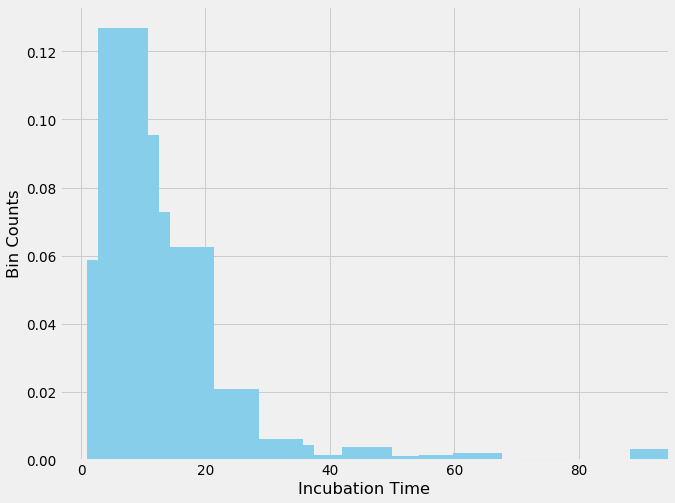

In [8]:
plt.hist(keyword_time, bins = 50, density = True,  width = 8.0, color = 'skyblue')
plt.ylabel("Bin Counts")
plt.xlabel("Incubation Time")